<a href="https://colab.research.google.com/github/souradipta93/NLP/blob/main/Visualise_word_embedding_full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualise word vectors

In [ ]:
import re, string 
import numpy as np
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('bbctext.csv')

In [ ]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
#Function for pre-processing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only two word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

In [ ]:
#Apply the function
df_clean = pd.DataFrame(df.text.apply(lambda x: preprocess_text(x)))

In [ ]:
import spacy 
  
nlp = spacy.load('en_core_web_sm') 

In [ ]:
#function to lemmatize text
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)



In [ ]:
df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['text']), axis=1)
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

In [ ]:
#tokenize text
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
        
sorted(word_freq, key=word_freq.get, reverse=True)[:15]

['say',
 'mr',
 'year',
 'would',
 'make',
 'also',
 'people',
 'new',
 'we',
 'one',
 'take',
 'go',
 'good',
 'could',
 'use']

- size:The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- window:The maximum distance between a target word and words around the target word.
- min_count: The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- workers:The number of threads to use while training.
- sg:The training algorithm, either CBOW (0) or skip gram (1)

#Build the word2vec model
w2v_model = Word2Vec(min_count=400,
                     window=3,
                     size=30,
                     workers=4)

In [ ]:
w2v_model = Word2Vec(vector_size=30,
                window=3,
                min_count=400,
                workers=4)


In [ ]:
#Prepare the model vocabulary
w2v_model.build_vocab(sentences)


In [ ]:
#Train word vectors
w2v_model.train(sentences, 
                total_examples=w2v_model.corpus_count, 
                epochs=2)
w2v_model.init_sims(replace=True) 
#When we do not plan to train the model any further, we use this line of code to make the model more memory-efficient.

In [ ]:
w2v_model.wv.key_to_index

{'say': 0,
 'mr': 1,
 'year': 2,
 'would': 3,
 'make': 4,
 'also': 5,
 'people': 6,
 'new': 7,
 'we': 8,
 'one': 9,
 'take': 10,
 'go': 11,
 'good': 12,
 'could': 13,
 'use': 14,
 'game': 15,
 'get': 16,
 'time': 17,
 '£': 18,
 'last': 19,
 'first': 20,
 'world': 21,
 'government': 22,
 'well': 23,
 'come': 24,
 'two': 25,
 'see': 26,
 'show': 27,
 'film': 28,
 'play': 29,
 'company': 30,
 'uk': 31,
 'tell': 32,
 'work': 33,
 'firm': 34,
 'give': 35,
 'want': 36,
 'add': 37,
 'back': 38,
 'win': 39,
 'like': 40,
 'number': 41,
 'service': 42,
 'include': 43,
 'think': 44,
 'way': 45,
 'music': 46,
 'month': 47,
 'market': 48,
 'many': 49,
 'country': 50,
 'player': 51,
 'plan': 52,
 'set': 53,
 'labour': 54,
 'need': 55,
 'week': 56,
 'next': 57,
 'party': 58,
 'report': 59,
 'bbc': 60,
 'three': 61,
 'look': 62,
 'big': 63,
 'minister': 64,
 'sale': 65,
 'home': 66,
 'election': 67,
 'may': 68,
 'call': 69,
 'million': 70,
 'day': 71,
 'expect': 72,
 'rise': 73,
 'technology': 74,
 'r

In [ ]:
w2v_model.wv.most_similar(positive=['british'])

[('star', 0.8749085068702698),
 ('film', 0.8535154461860657),
 ('director', 0.8463858366012573),
 ('man', 0.8456218242645264),
 ('award', 0.8255392909049988),
 ('london', 0.805381715297699),
 ('good', 0.8007272481918335),
 ('include', 0.7904858589172363),
 ('britain', 0.7447593212127686),
 ('former', 0.7242653965950012)]

In [ ]:
w2v_model.wv.similarity('believe', 'business')

0.21482402

## Visualise word vectors in two dimension

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
w2v_model.wv.key_to_index

{'say': 0,
 'mr': 1,
 'year': 2,
 'would': 3,
 'make': 4,
 'also': 5,
 'people': 6,
 'new': 7,
 'we': 8,
 'one': 9,
 'take': 10,
 'go': 11,
 'good': 12,
 'could': 13,
 'use': 14,
 'game': 15,
 'get': 16,
 'time': 17,
 '£': 18,
 'last': 19,
 'first': 20,
 'world': 21,
 'government': 22,
 'well': 23,
 'come': 24,
 'two': 25,
 'see': 26,
 'show': 27,
 'film': 28,
 'play': 29,
 'company': 30,
 'uk': 31,
 'tell': 32,
 'work': 33,
 'firm': 34,
 'give': 35,
 'want': 36,
 'add': 37,
 'back': 38,
 'win': 39,
 'like': 40,
 'number': 41,
 'service': 42,
 'include': 43,
 'think': 44,
 'way': 45,
 'music': 46,
 'month': 47,
 'market': 48,
 'many': 49,
 'country': 50,
 'player': 51,
 'plan': 52,
 'set': 53,
 'labour': 54,
 'need': 55,
 'week': 56,
 'next': 57,
 'party': 58,
 'report': 59,
 'bbc': 60,
 'three': 61,
 'look': 62,
 'big': 63,
 'minister': 64,
 'sale': 65,
 'home': 66,
 'election': 67,
 'may': 68,
 'call': 69,
 'million': 70,
 'day': 71,
 'expect': 72,
 'rise': 73,
 'technology': 74,
 'r

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np  

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


In [ ]:
x_vals, y_vals, labels = reduce_dimensions(w2v_model)

In [ ]:
import matplotlib.pyplot as plt
import random
plt.rcParams["figure.figsize"] = (20,15)

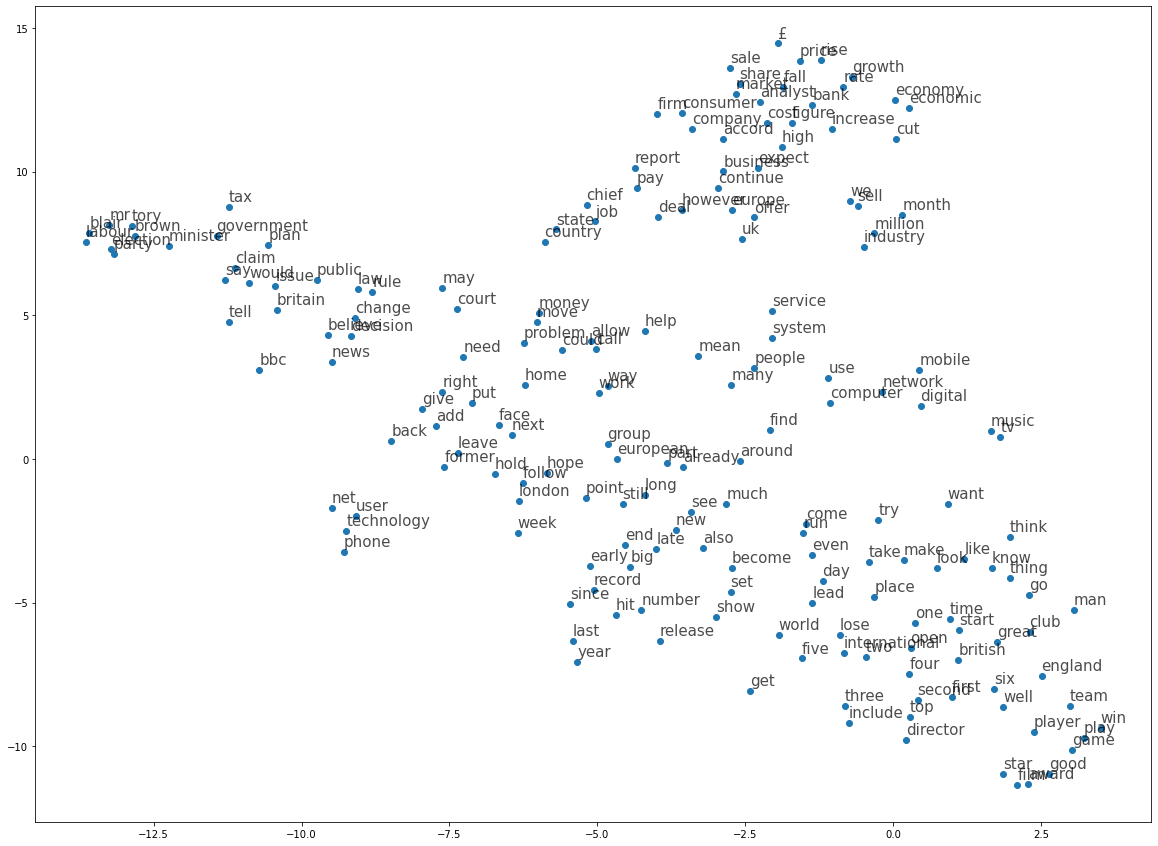

In [ ]:
plt.scatter(x_vals, y_vals)
# Loop for annotation of all points
for i in range(len(labels)):
    plt.annotate(labels[i], (x_vals[i], y_vals[i] + 0.2), fontsize=15, alpha=0.7)
